### Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 18 kB/s 
     |████████████████████████████████| 37.1 MB 52 kB/s 


In [87]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Read in Image, Grayscale and Blur

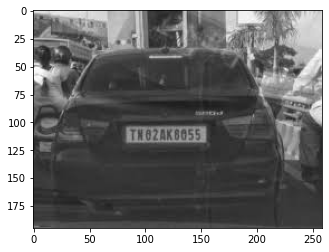

In [99]:
img = cv2.imread('/content/image_files/images337.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Apply filter and find edges for localization

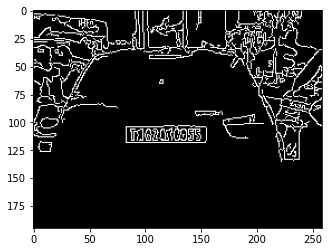

In [100]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Find Contours and Apply Mask

In [101]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [102]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [103]:
location

array([[[ 83, 104]],

       [[ 83, 118]],

       [[155, 116]],

       [[154, 104]]], dtype=int32)

In [104]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

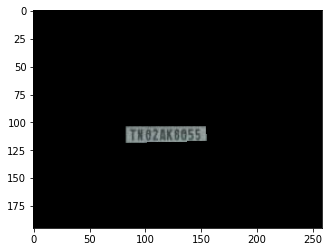

In [105]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [106]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

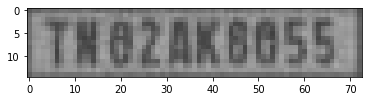

In [107]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Use Easy OCR To Read Text

In [108]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[17, 1], [71, 1], [71, 15], [17, 15]], '02 Akb055', 0.17503497543080554)]

## Render Result

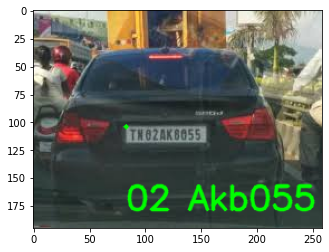

In [109]:
text = result[0][-2]

font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[0][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [110]:
print("the result is ",text)

the result is  02 Akb055
